In [1]:
#PROJECT FOR DATA ANALYSIS BY RISHABH SINGH

import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('amazon_prime_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [3]:
#dropping unwanted columns
data.drop(['show_id'],axis=1,inplace=True)
data.drop(['description'],axis=1,inplace=True)
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy"


In [4]:
#Checking for duplicates
data.duplicated().sum()

0

In [5]:
data.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9668 non-null   object
 1   title         9668 non-null   object
 2   director      7585 non-null   object
 3   cast          8435 non-null   object
 4   country       672 non-null    object
 5   date_added    155 non-null    object
 6   release_year  9668 non-null   int64 
 7   rating        9331 non-null   object
 8   duration      9668 non-null   object
 9   listed_in     9668 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


In [7]:
#checking for null values
data.isna().sum()

type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
dtype: int64

In [8]:
#Filling null values
data['director'].fillna('Unavailable',inplace=True)
data['cast'].fillna('Unavailable',inplace=True)
data['country'].fillna('Unavailable',inplace=True)
data['date_added']=data['date_added'].ffill() #ffill will copy and paste the value which is above the null value
data['rating']=data['rating'].fillna(data['rating'].mode()[0])
data.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [9]:
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy"


In [10]:
data['date_added']=pd.to_datetime(data['date_added']) #use attribute errors='coerce' to ignore errors
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          9668 non-null   object        
 1   title         9668 non-null   object        
 2   director      9668 non-null   object        
 3   cast          9668 non-null   object        
 4   country       9668 non-null   object        
 5   date_added    9668 non-null   datetime64[ns]
 6   release_year  9668 non-null   int64         
 7   rating        9668 non-null   object        
 8   duration      9668 non-null   object        
 9   listed_in     9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 755.4+ KB


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,13+,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,13+,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,13+,45 min,"Drama, Fantasy"


In [11]:
#Top 10 directors
filt_directors=data[data['director']!='Unavailable']
top_dir= filt_directors['director'].value_counts().head(10)

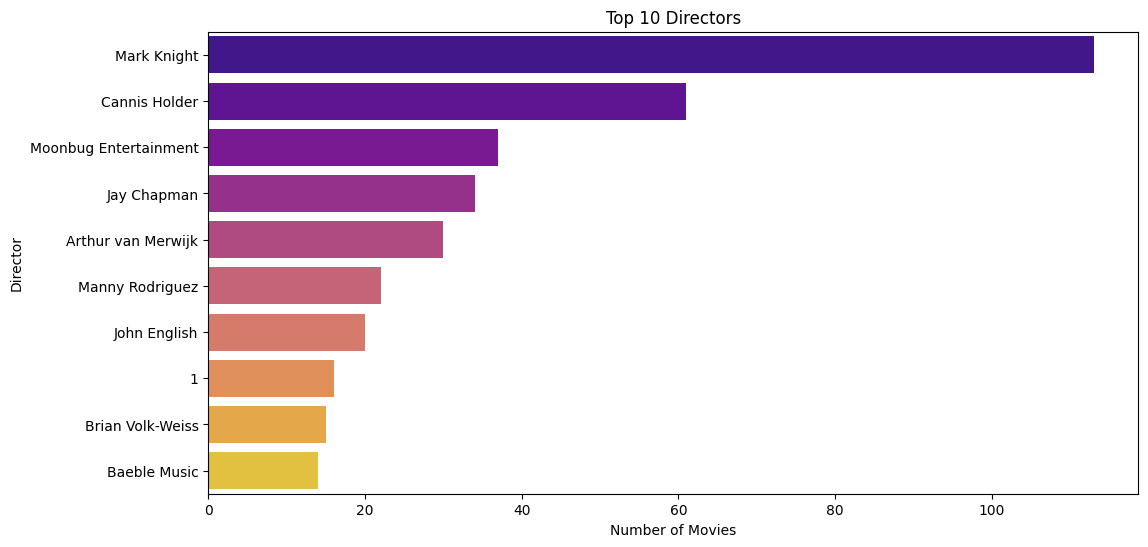

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_dir.values,y=top_dir.index,palette='plasma')
plt.title('Top 10 Directors')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

In [13]:
#Filtering actors
filt_actor=data[data['cast']!='Unavailable']
top_actors=filt_actor['cast'].value_counts().head(10)

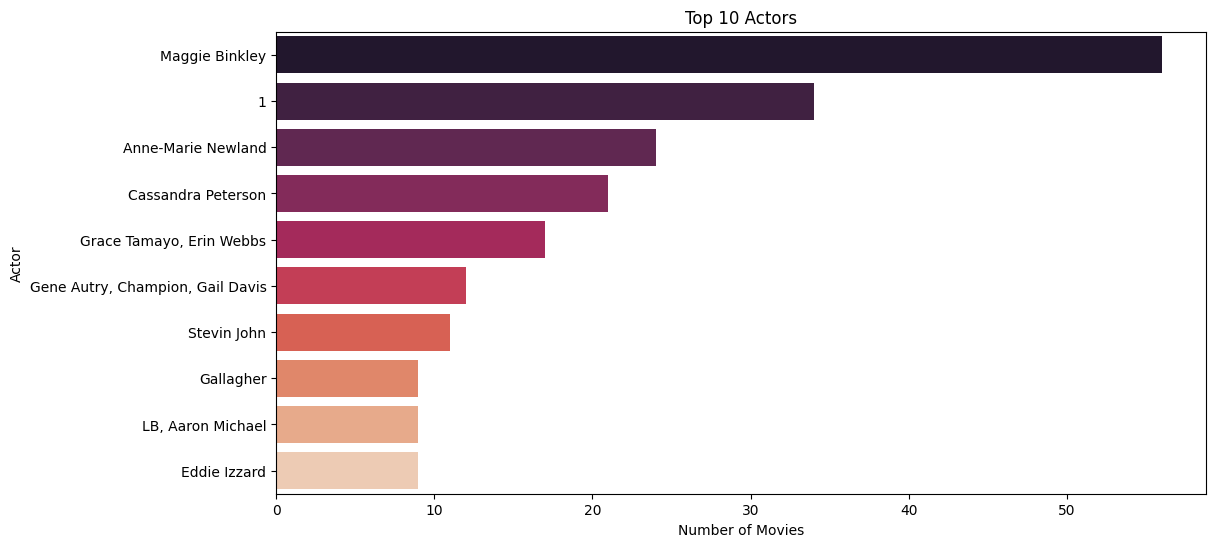

In [14]:
#Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=top_actors.values,y=top_actors.index,palette='rocket')
plt.title('Top 10 Actors')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

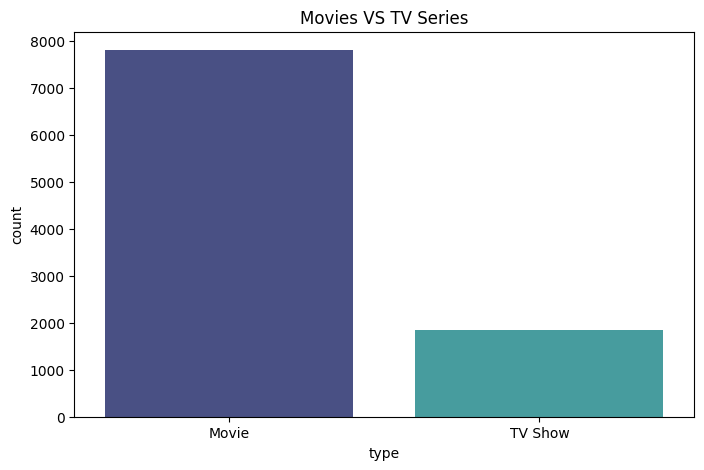

In [15]:
#Count of each content type- TV or Movie
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='type',palette='mako')
plt.title('Movies VS TV Series')
plt.show()

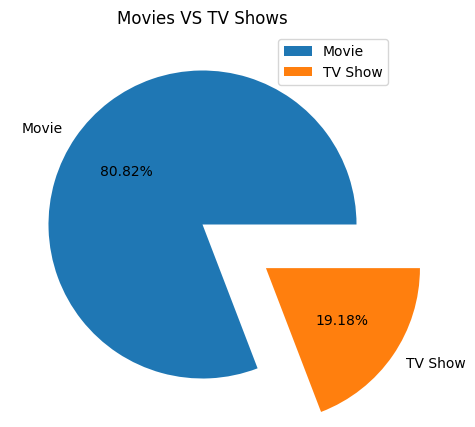

In [16]:
#Making a pie chart for the same
df_pie=data['type'].copy().value_counts()
plt.figure(figsize=(8,5))
plt.pie(x=df_pie.values,labels=df_pie.index,autopct='%1.2f%%',explode=[0,0.5])
plt.title('Movies VS TV Shows')
plt.legend()
plt.show()

<Axes: xlabel='rating', ylabel='count'>

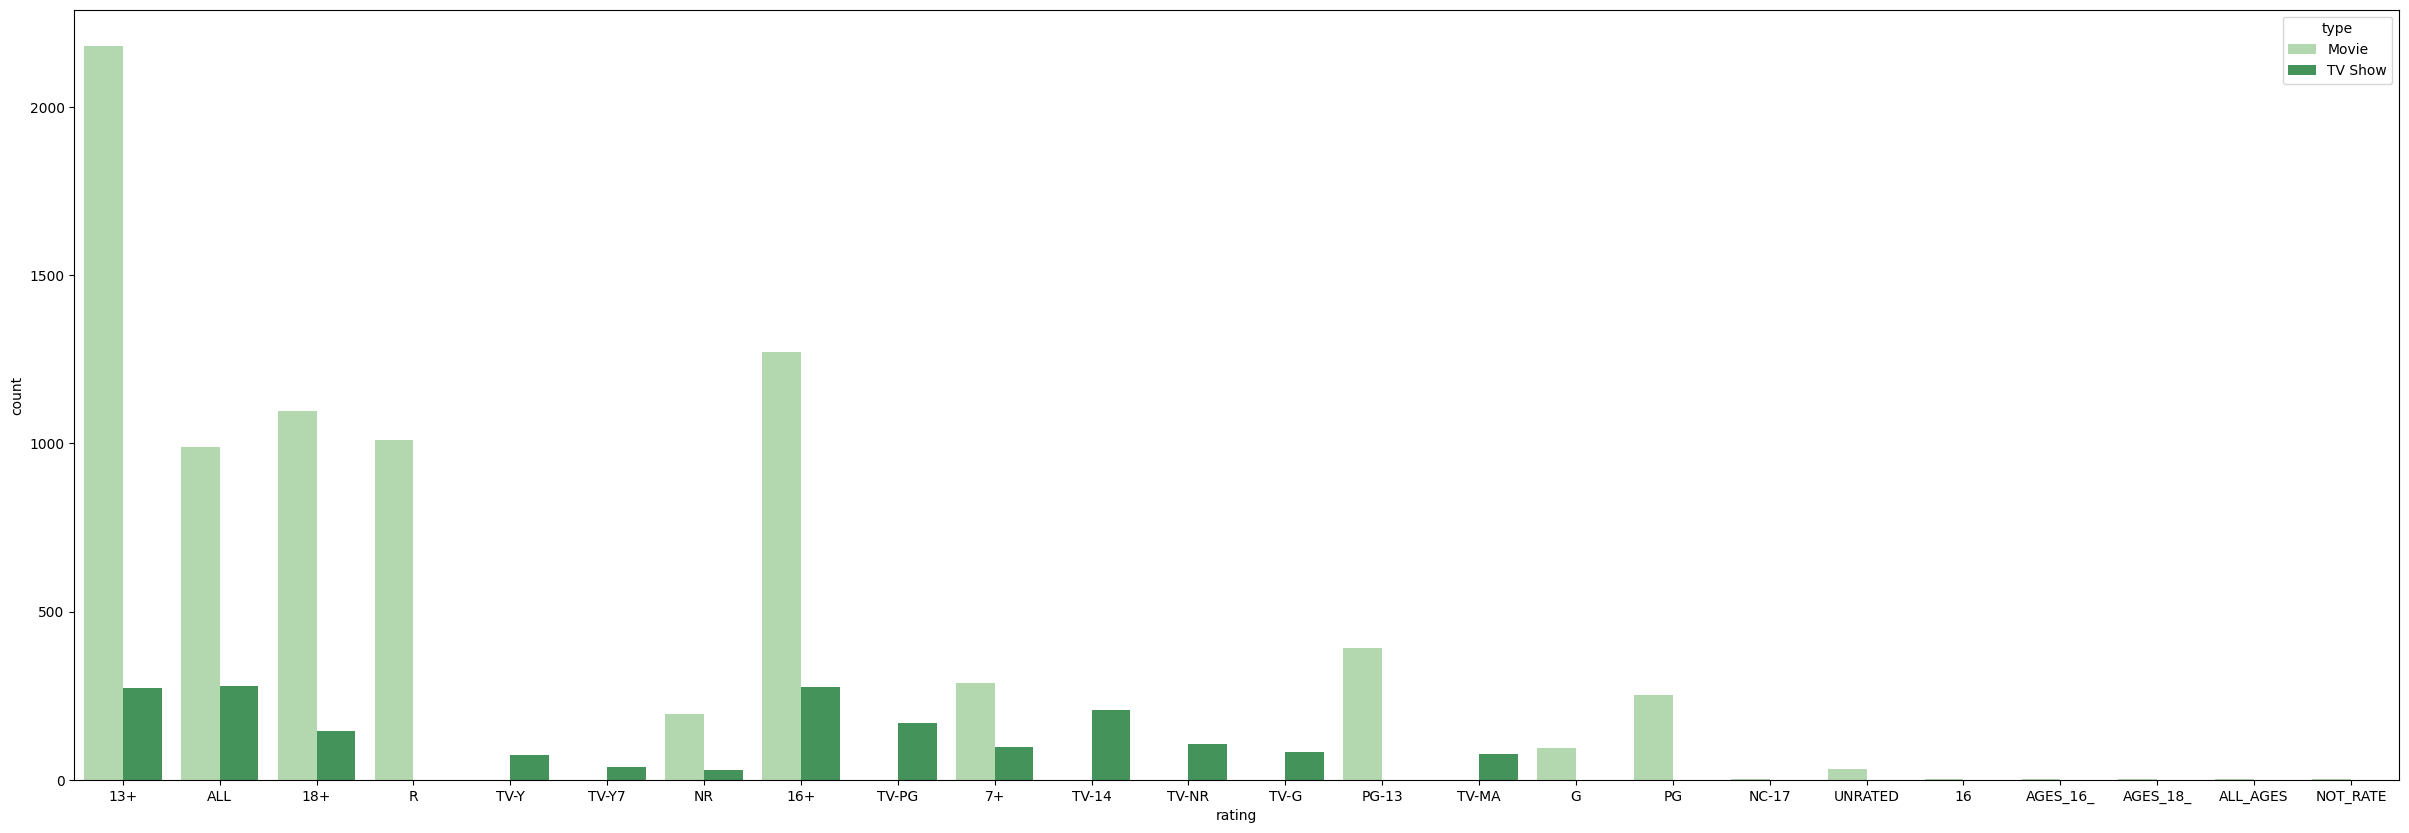

In [17]:
#Chart for rating by TV show and Series
plt.figure(figsize=(30,10))
sns.countplot(x=data['rating'],data=data,hue='type',palette='Greens')

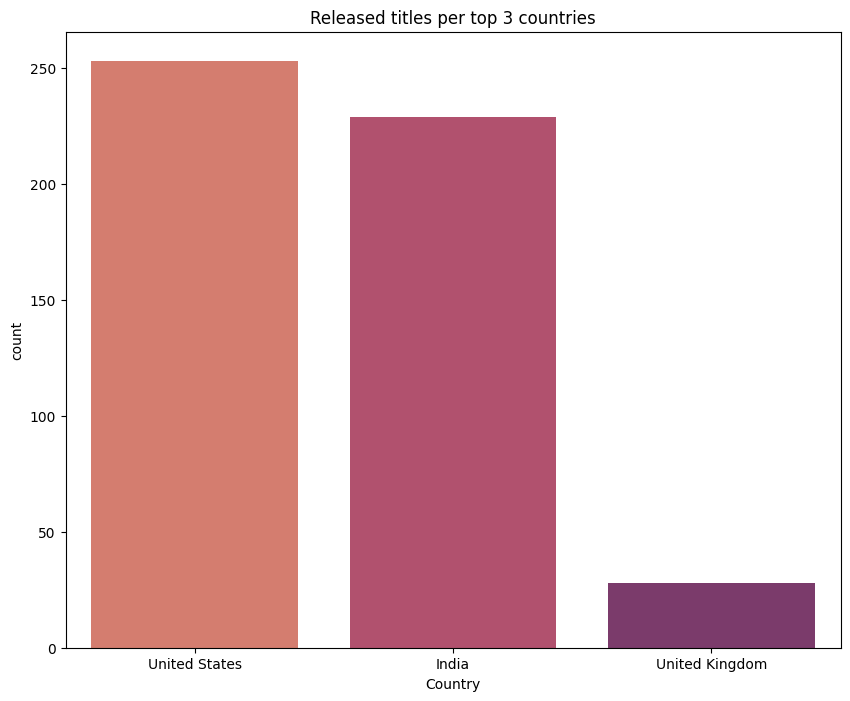

In [18]:
#Calculating the number of titles per country
Filt_country=data[data['country']!='Unavailable']
country_count=Filt_country['country'].value_counts()

#Top countries
top_country=country_count.nlargest(3).index #can also use head(3)

#Filtering the DataFrame to include only top 3 countries
df_top_countries=Filt_country[Filt_country['country'].isin(top_country)]

#Plotting the number of titles released per top 3 countries
plt.figure(figsize=(10,8))
sns.countplot(data=df_top_countries,x='country',palette='flare',order=top_country)
plt.title('Released titles per top 3 countries')
plt.xlabel('Country')
plt.show()

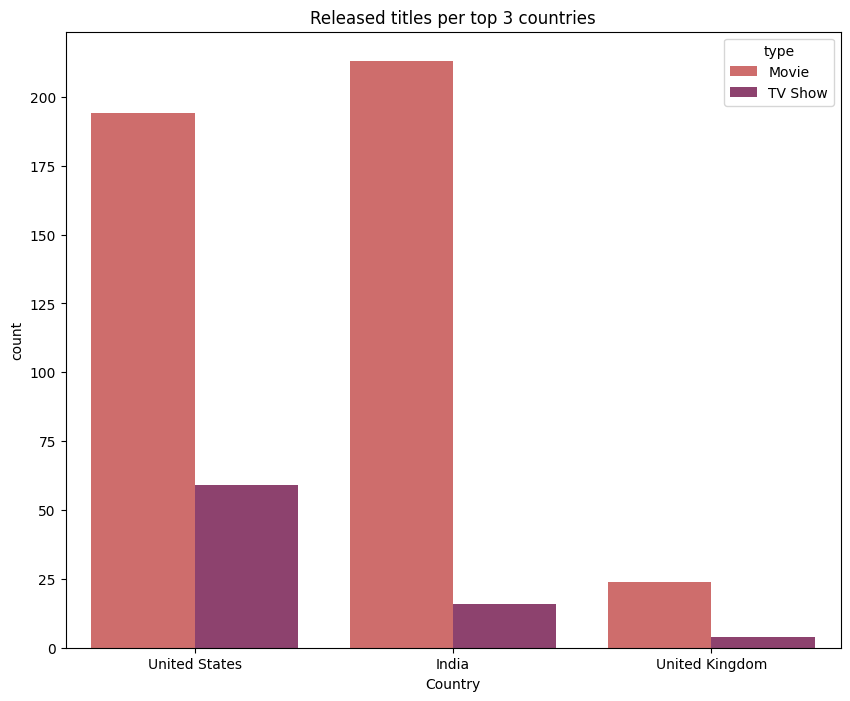

In [19]:
#Calculating the number of titles per country
Filt_country=data[data['country']!='Unavailable']
country_count=Filt_country['country'].value_counts()

#Top countries
top_country=country_count.nlargest(3).index #can also use head(3)

#Filtering the DataFrame to include only top 3 countries
df_top_countries=Filt_country[Filt_country['country'].isin(top_country)]

#Plotting the number of titles released per top 3 countries
plt.figure(figsize=(10,8))
sns.countplot(data=df_top_countries,x='country',hue='type',palette='flare',order=top_country)
plt.title('Released titles per top 3 countries')
plt.xlabel('Country')
plt.show()

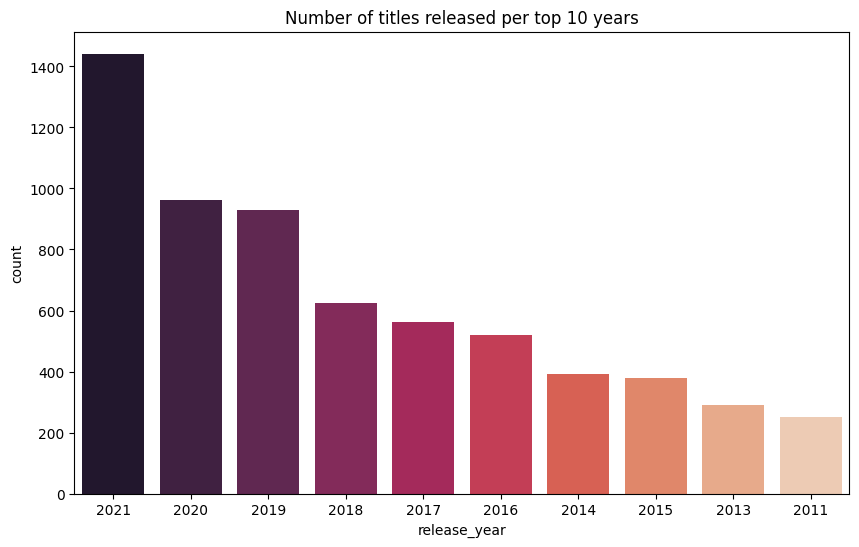

In [20]:
#Titles released by year
year_counts=data['release_year'].value_counts()

#top 10 release years
top_years=year_counts.nlargest(10).index

#Filtering the df to include only the top years
df_top_years=data[data['release_year'].isin(top_years)]

#Plotting
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_years,x='release_year',palette='rocket',order=top_years)
plt.title('Number of titles released per top 10 years')
plt.show()

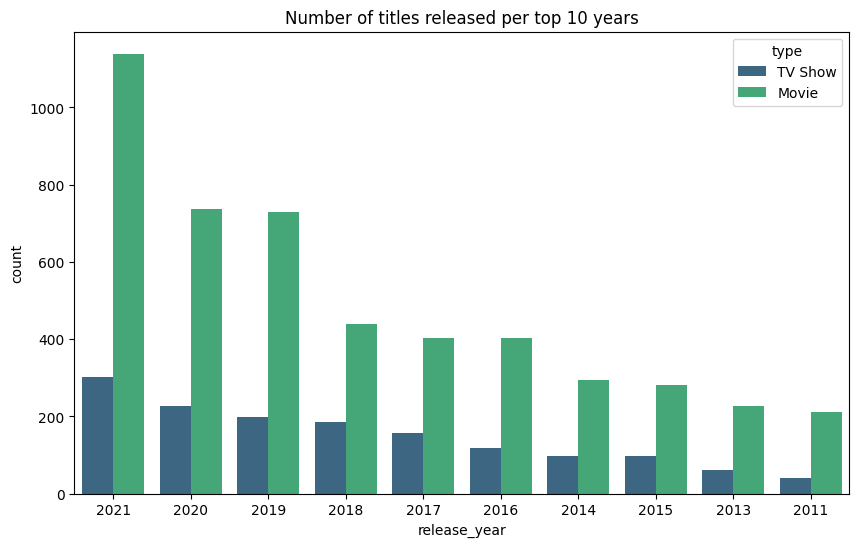

In [21]:
 #Titles released by year
year_counts=data['release_year'].value_counts()

#top 10 release years
top_years=year_counts.nlargest(10).index

#Filtering the df to include only the top years
df_top_years=data[data['release_year'].isin(top_years)]

#Plotting
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_years,x='release_year',hue='type',palette='viridis',order=top_years)
plt.title('Number of titles released per top 10 years')
plt.show()

In [22]:
#Distribution of genres
#Splitting the genres
data['Genres']=data['listed_in'].apply(lambda x: x.split(', '))

In [23]:
#Exploding the genres into separate rows
genres_exploded=data.explode('Genres')
#genres_exploded

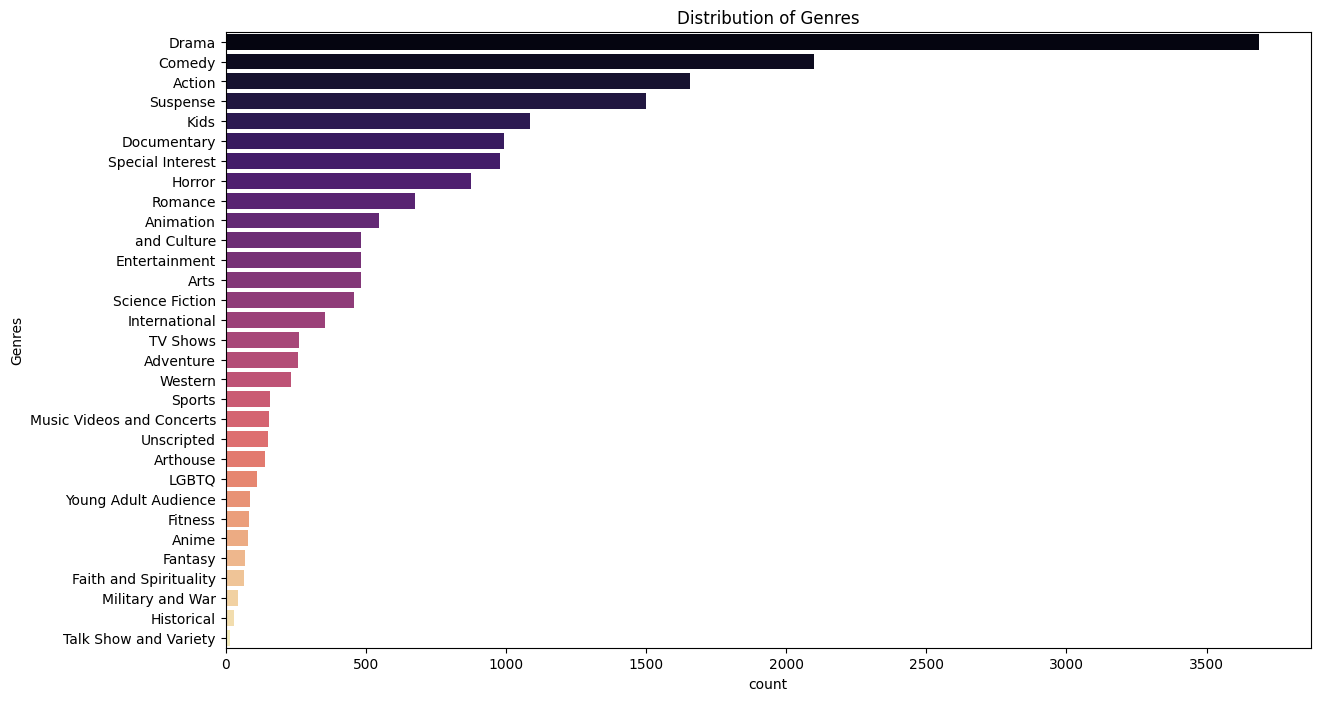

In [24]:
plt.figure(figsize=(14,8))
sns.countplot(data=genres_exploded,y='Genres',order=genres_exploded['Genres'].value_counts().index,palette='magma')
plt.title('Distribution of Genres')
plt.show()

In [25]:
#Filter data for Movies and TV shows separately
df_TV=data[data['type']=='TV Show'].copy()
df_Movie=data[data['type']=='Movie'].copy()

#Extract numeric duration for movies
df_Movie['dur_num']=df_Movie['duration'].str.extract('(\d+)',expand=False).astype(float)

#Extract numeric duration of TV Shows
df_TV['dur_num']=df_TV['duration'].str.extract('(\d+)',expand=False).astype(float)

In [26]:
#Removing unused columns
df_Movie.drop(['duration'],axis=1,inplace=True)
df_TV.drop(['duration'],axis=1,inplace=True)


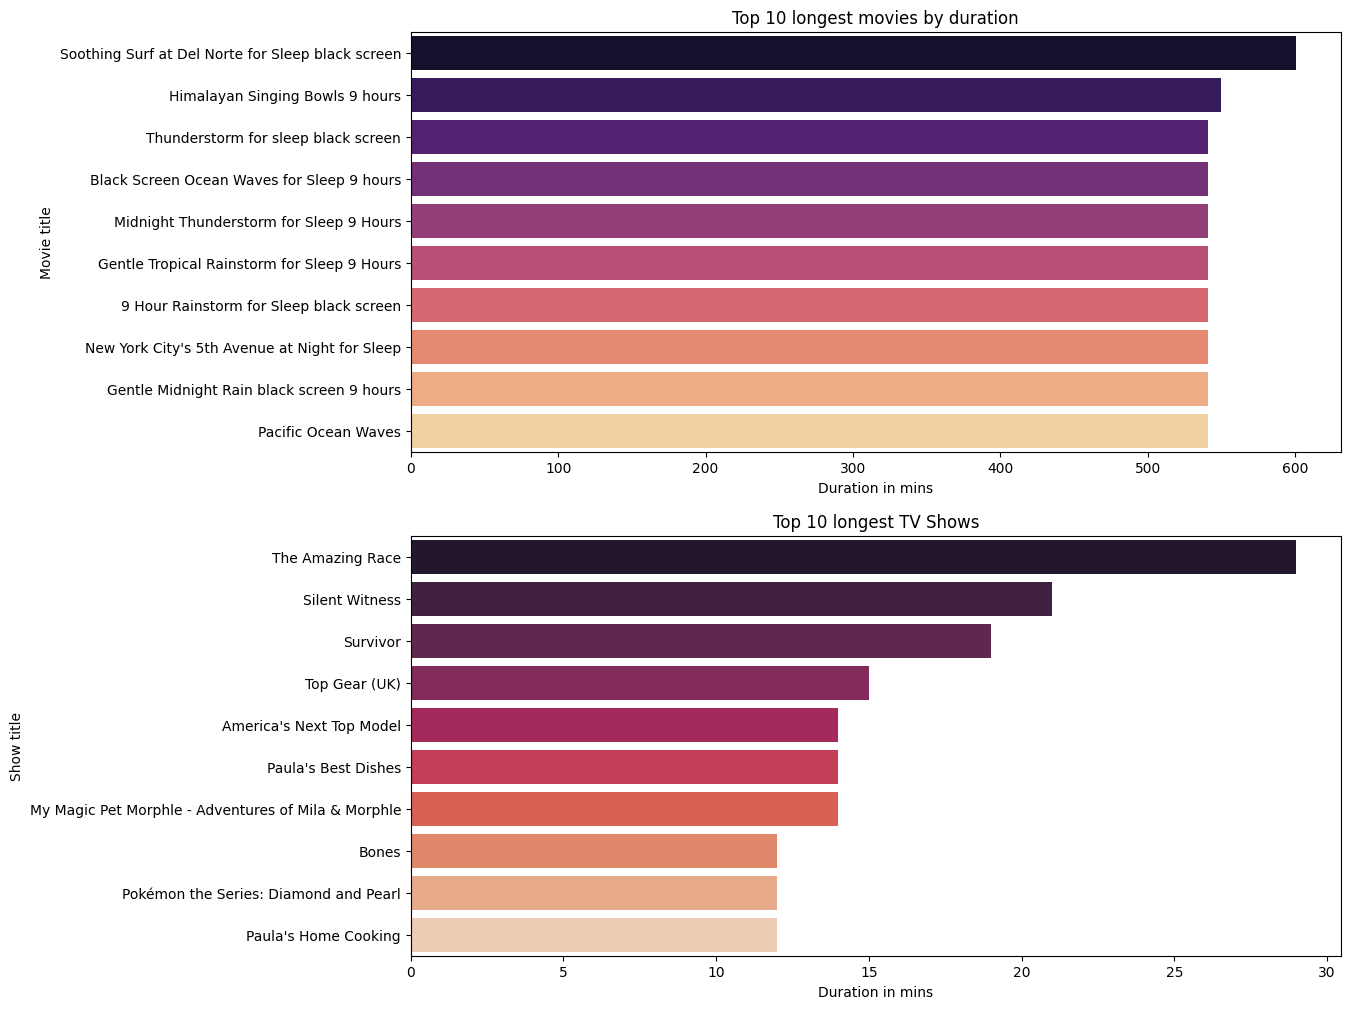

In [27]:
#Plotting
plt.figure(figsize=(12,12))

#Plot 1 for Movies
plt.subplot(2,1,1)
sns.barplot(data=df_Movie.sort_values(by='dur_num',ascending=False).head(10),y='title',x='dur_num',orient='horizontal',palette='magma')
plt.title('Top 10 longest movies by duration')
plt.xlabel('Duration in mins')
plt.ylabel('Movie title')

#Plot 2 for TV Shows
plt.subplot(2,1,2)
sns.barplot(data=df_TV.sort_values(by='dur_num',ascending=False).head(10),y='title',x='dur_num',orient='horizontal', palette='rocket')
plt.title('Top 10 longest TV Shows')
plt.ylabel('Show title')
plt.xlabel('Duration in mins')

plt.show()

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

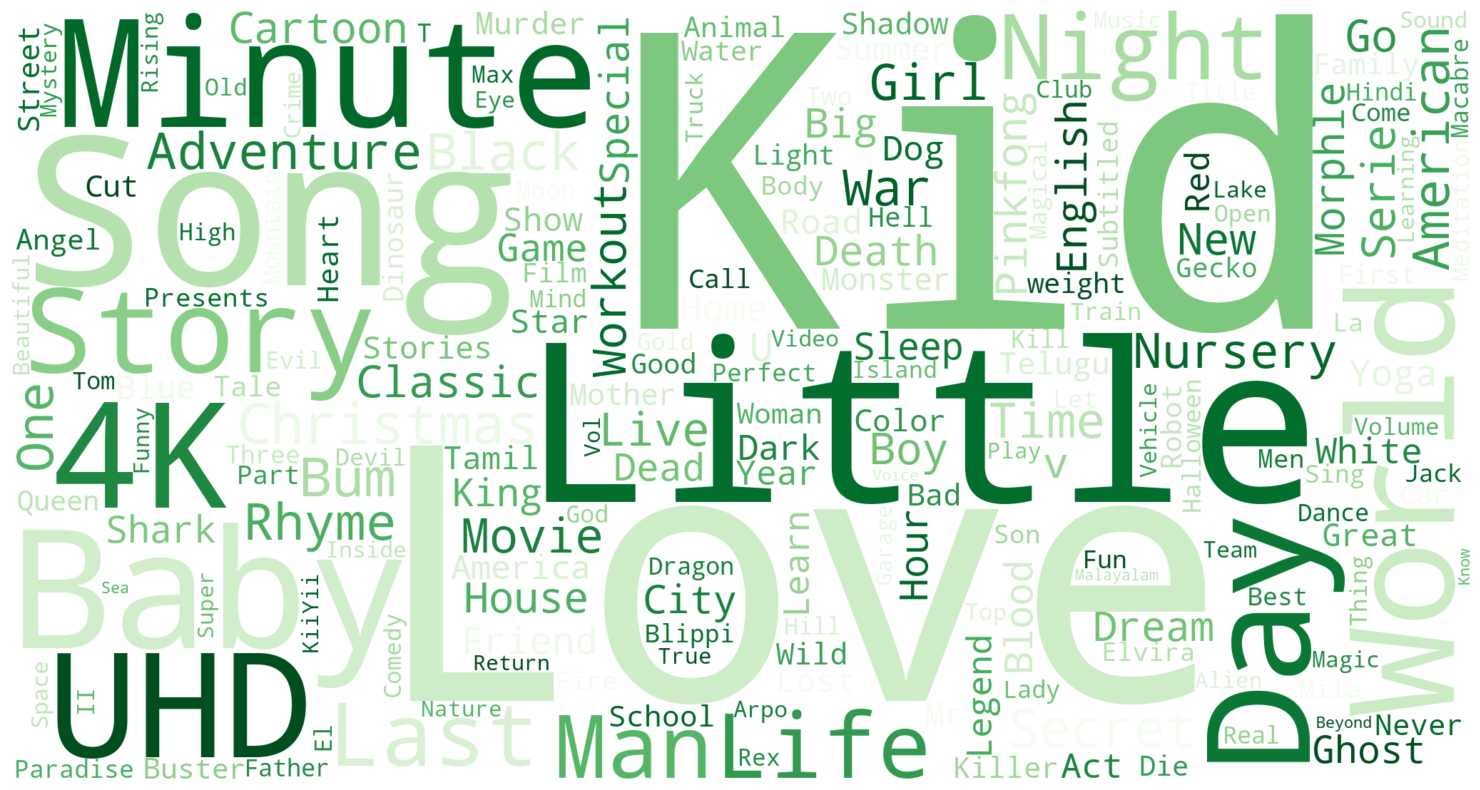

In [31]:
#Making wordcloud for title column
txt1=" ".join(title for title in data.title)

word_cloud1=WordCloud(collocations=False, background_color='white',width=2048,height=1080,colormap='Greens_r').generate(txt1)

#plotting
plt.figure(figsize=(30,10))
plt.imshow(word_cloud1,interpolation='bilinear')
plt.axis('off')
plt.show()

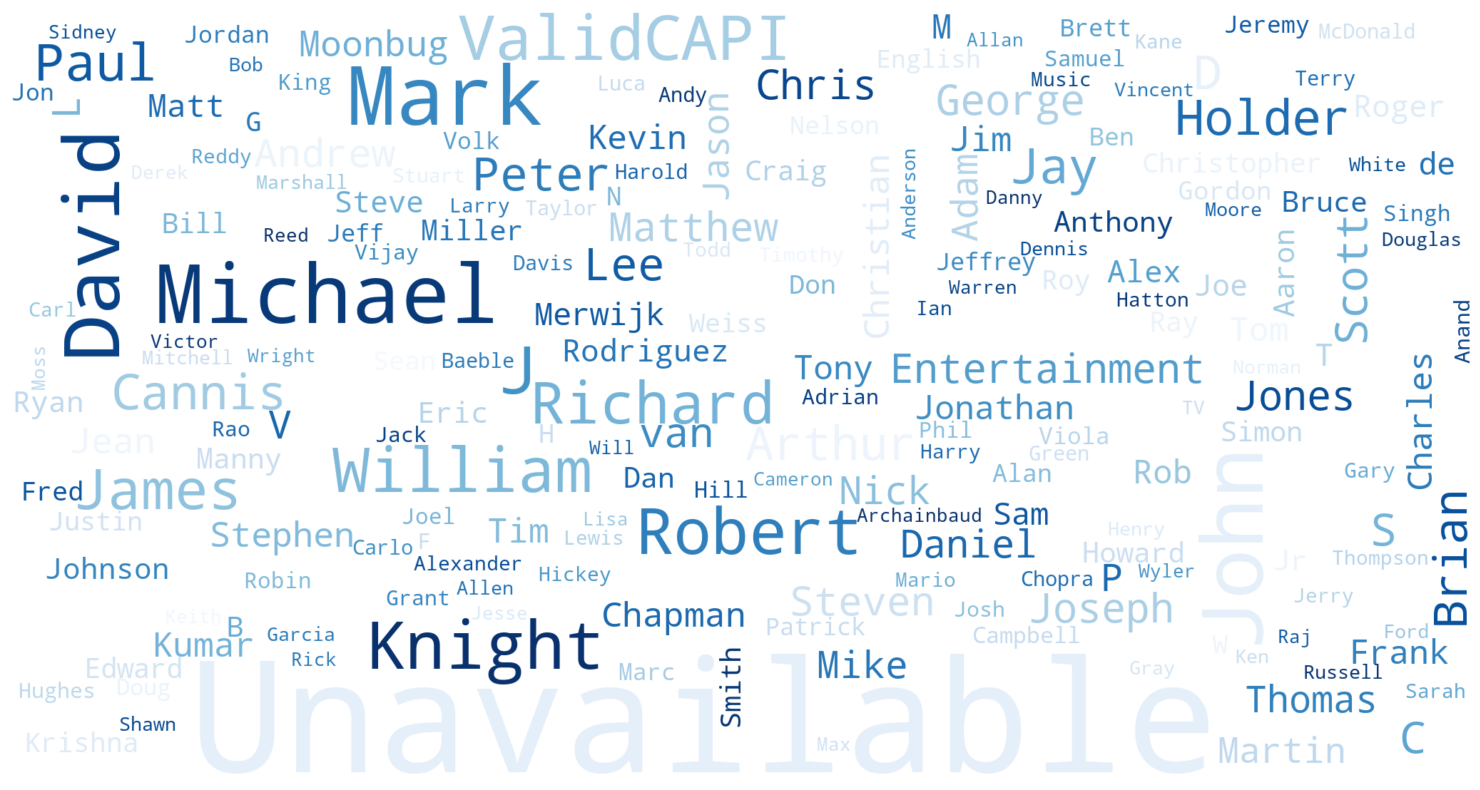

In [34]:
#Making wordcloud for director column
txt1=" ".join(director for director in data.director)

word_cloud1=WordCloud(collocations=False, background_color='white',width=2048,height=1080,colormap='Blues_r').generate(txt1)

#plotting
plt.figure(figsize=(30,10))
plt.imshow(word_cloud1,interpolation='bilinear')
plt.axis('off')
plt.show()

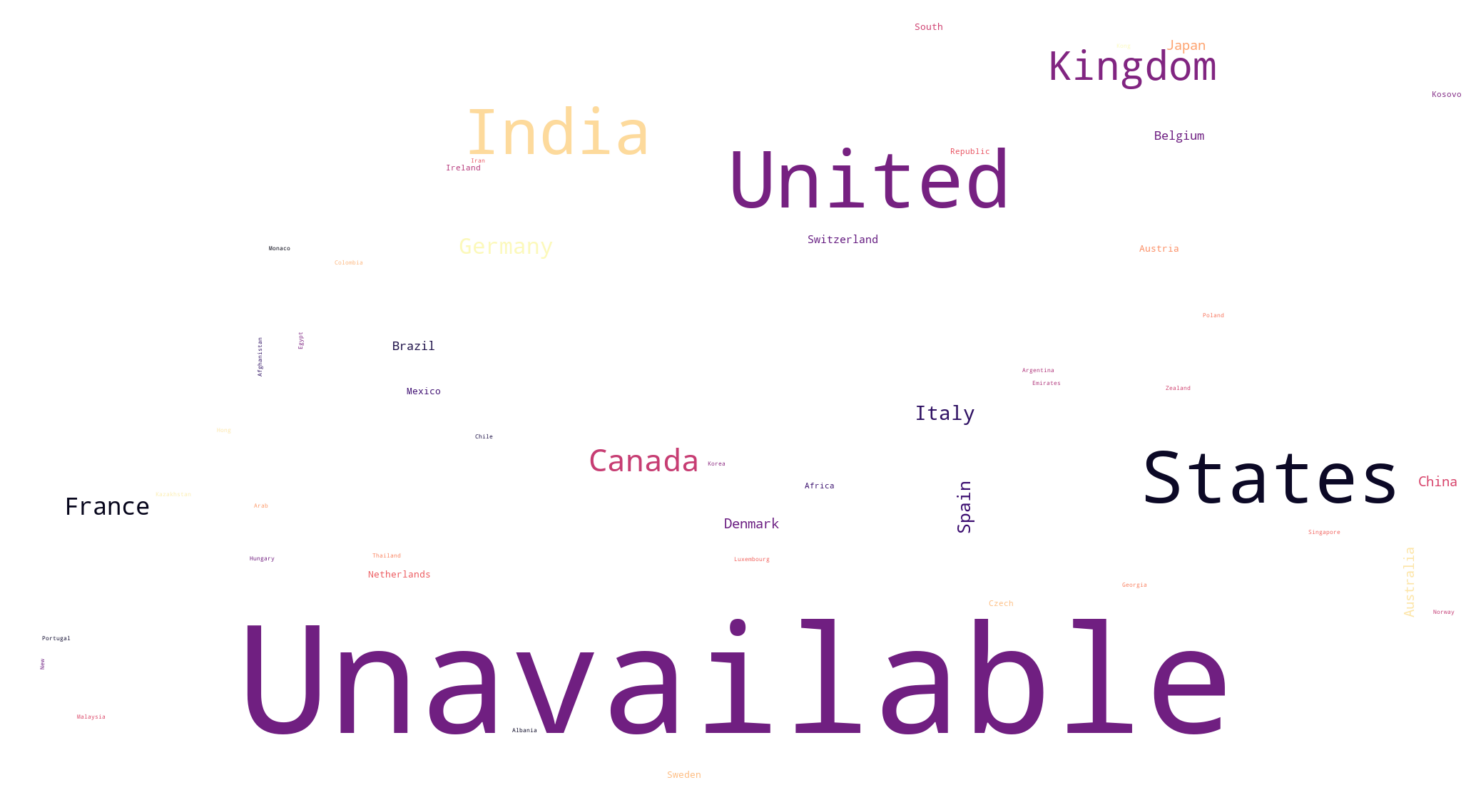

In [38]:
#Making wordcloud for country column
txt1=" ".join(country for country in data.country)

word_cloud1=WordCloud(collocations=False, background_color='white',width=2048,height=1080,colormap='magma').generate(txt1)

#plotting
plt.figure(figsize=(30,10))
plt.imshow(word_cloud1,interpolation='bilinear')
plt.axis('off')
plt.show()

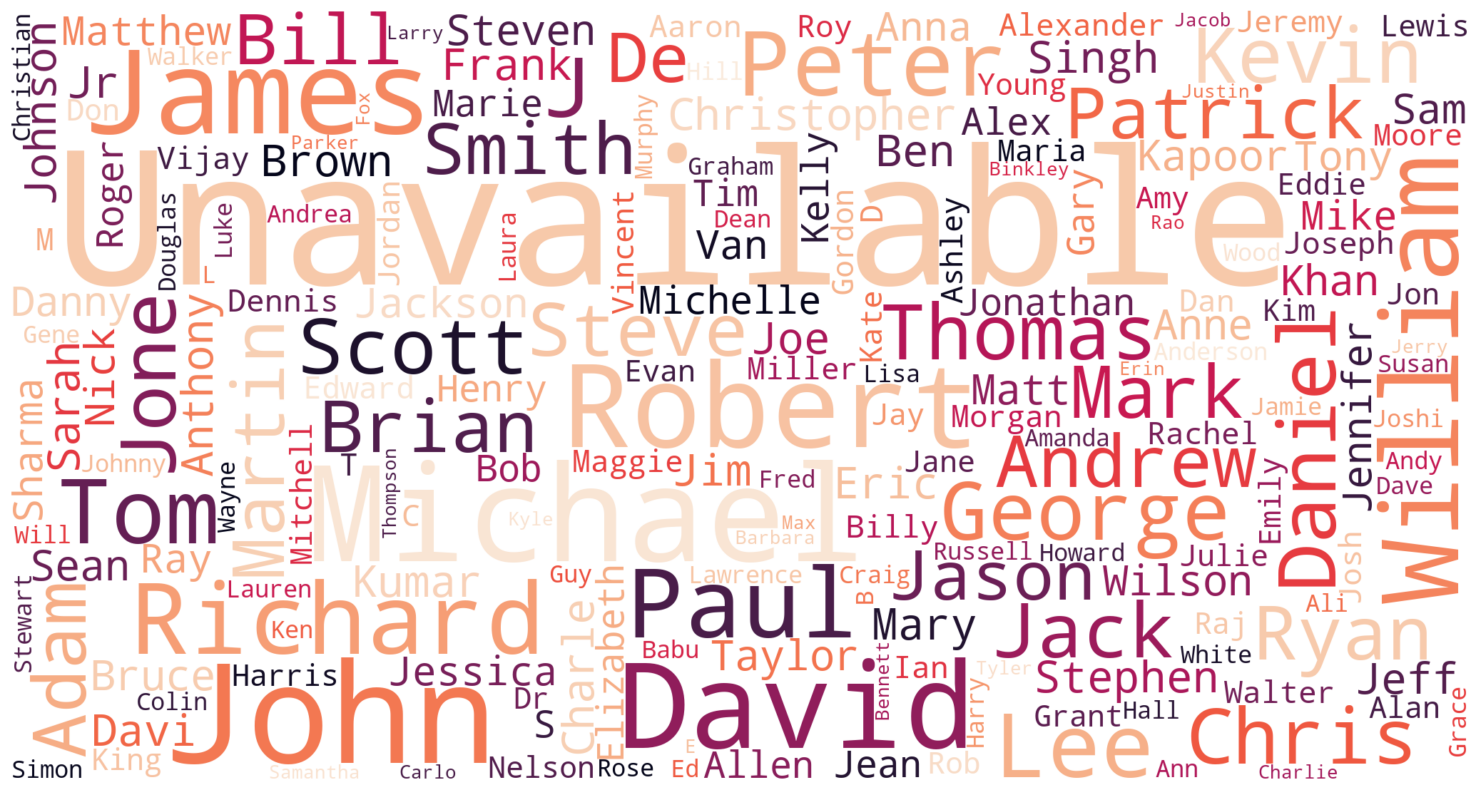

In [37]:
#Making wordcloud for cast column
txt1=" ".join(cast for cast in data.cast)

word_cloud1=WordCloud(collocations=False, background_color='white',width=2048,height=1080,colormap='rocket').generate(txt1)

#plotting
plt.figure(figsize=(30,10))
plt.imshow(word_cloud1,interpolation='bilinear')
plt.axis('off')
plt.show()